Predicting whether a client will subscribe to a Term deposit or Not.Feature selection is done to get the top important features. Different classification models are used to compare performance output and the results are compared

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Step 1: Data Preprocessing

In [2]:
# Load data file
bank=pd.read_csv('bank.csv',sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# Checking for Missing Values
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Converting Categorial variables to Numerical values. I am going to use a manual mapping process since the numer of categorical variables is limited

In [4]:
#Converting Categorial variables 'job' to Numerical values
print(pd.unique(bank['job']))
d = {'unemployed':0, 'services':1, 'management':2, 'blue-collar':3,'self-employed':4, 'technician':5, 'entrepreneur':6, 
     'admin.':7, 'student':8,'housemaid':9, 'retired':10, 'unknown':11}
bank['job'] = bank['job'].map(d)

['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']


In [5]:
#Converting Categorial variables 'education' to Numerical values
print(pd.unique(bank['education']))
d = {'primary':1, 'secondary':2, 'tertiary':3, 'unknown':4}
bank['education'] = bank['education'].map(d)

['primary' 'secondary' 'tertiary' 'unknown']


In [6]:
#Converting Categorial variables 'default' to Numerical values
print(pd.unique(bank['default']))
d = {'no':0, 'yes':1}
bank['default'] = bank['default'].map(d)

['no' 'yes']


In [7]:
#Converting Categorial variables 'housing' to Numerical values
print(pd.unique(bank['housing']))
d = {'no':0, 'yes':1}
bank['housing'] = bank['housing'].map(d)

['no' 'yes']


In [8]:
#Converting Categorial variables 'loan' to Numerical values
print(pd.unique(bank['loan']))
d = {'no':0, 'yes':1}
bank['loan'] = bank['loan'].map(d)

['no' 'yes']


In [9]:
#Converting Categorial variables 'contact' to Numerical values
print(pd.unique(bank['contact']))
d = {'cellular': 0, 'telephone': 1, 'unknown': 2}
bank['contact'] = bank['contact'].map(d)

['cellular' 'unknown' 'telephone']


In [10]:
#Converting Categorial variables 'month' to Numerical values
print(pd.unique(bank['month']))
d = {'jan': 1, 'feb': 2, 'mar': 3,'apr': 4, 'may': 5, 'jun': 6,'jul': 7, 'aug': 8, 'sep': 9,'oct': 10, 'nov': 11, 'dec': 12}
bank['month'] = bank['month'].map(d)

['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']


In [11]:
#Converting Categorial variables 'poutcome' to Numerical values
print(pd.unique(bank['poutcome']))
d = {'success': 1, 'failure': 0, 'other': 2,'unknown':3}
bank['poutcome'] = bank['poutcome'].map(d)

['unknown' 'failure' 'other' 'success']


In [12]:
#Converting Categorial variables 'housing' to marital values
print(pd.unique(bank['marital']))
d = {'married': 1, 'single': 0, 'divorced': 2}
bank['marital'] = bank['marital'].map(d)

['married' 'single' 'divorced']


In [13]:
#Converting Categorial variables 'y' to Numerical values
print(pd.unique(bank['y']))
d = {'no':0, 'yes':1}
bank['y'] = bank['y'].map(d)

['no' 'yes']


In [14]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,1,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,1,1,2,0,4789,1,1,0,11,5,220,1,339,4,0,0
2,35,2,0,3,0,1350,1,0,0,16,4,185,1,330,1,0,0
3,30,2,1,3,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,3,1,2,0,0,1,0,2,5,5,226,1,-1,0,3,0


In [15]:
features = list(bank.columns[:16])

In [16]:
#Converting dataframe to numpy array and outlier Removal
bank.to_numpy()
z = np.abs(stats.zscore(bank))
bank = bank[(z < 3).all(axis=1)]
print("Size After Outlier Removal",bank.shape)

Size After Outlier Removal (3908, 17)


In [17]:
#Feature Selection
y = bank["y"]
X = bank[features]
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) ## use inbuilt class feature_importances of tree based classifiers

[0.08691781 0.06928901 0.04197859 0.04953763 0.         0.08894073
 0.02597624 0.01519905 0.02944732 0.0934335  0.09987928 0.22721003
 0.0597495  0.03171833 0.02921812 0.05150485]


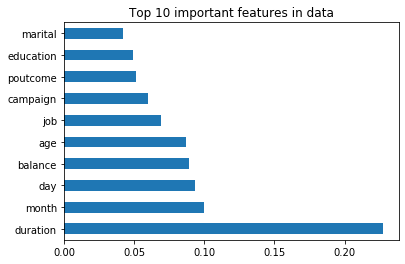

In [18]:
## plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 important features in data")
plt.show()

In [19]:
best_features = ['duration','day','month','age','balance', 'job','campaign', 'poutcome', 'education','marital']
X = bank[best_features]
y = bank["y"]

In [20]:
#Normalizing the data
scaler = MinMaxScaler()
x = scaler.fit_transform(X)

In [21]:
#Splitting the data into train (75%) and test (25%)
x_train, x_test, y_train, y_test = train_test_split(x , y,shuffle = True,test_size=0.25,random_state=1)

In [49]:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (2931, 10)
Shape of testing feature: (977, 10)
Shape of training label: (2931,)
Shape of training label: (977,)


## Step 2: Applying Techniques

### Decision Tree

#### Using Test/Train Split

In [41]:
#Decision Tree Classifier
dt=tree.DecisionTreeClassifier(random_state = 18)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_test = metrics.accuracy_score(y_pred,y_test)
print('Accuracy Score of decision tree classifier',accuracy_test*100)

Accuracy Score of decision tree classifier 87.30808597748208


#### Using 10 Fold Cross Validation

In [38]:
#print(model_selection.cross_val_score(dt, x_test,y_test,scoring = 'accuracy', cv=10))
dt=tree.DecisionTreeClassifier()
mean_score = model_selection.cross_val_score(dt, x,y,scoring = 'accuracy',cv=10).mean()
print("Mean Accuracy Score of Decision Tree with Cross Validation:",mean_score*100)

Mean Accuracy Score of Decision Tree with Cross Validation: 87.82018493015936


### Random Forest

#### N Estimators-10 and 10 Fold Cross Validation

In [24]:
#print(model_selection.cross_val_score(rf, x_test,y_test,scoring = 'accuracy', cv=10))
rf = RandomForestClassifier(n_estimators=10,random_state=3)
mean_score= model_selection.cross_val_score(rf, x,y,scoring = 'accuracy',cv=10).mean()
print("Random Forest Accuracy with CV- \n",mean_score*100)

Random Forest Accuracy with CV- 
 90.09705554462587


#### Inference: 
Random forest had mean accuarcy score of 90.09% perfomed better than Decision Tree (with test/train split having accuracy score 87.3% and 10-fold cross validation having accuracy score 87.82%)

### KNN

#### N Neighbours-10 and 10 Fold Cross Validation

In [44]:
knn = KNeighborsClassifier(n_neighbors=10)
print("Accuracy Score with CV:",model_selection.cross_val_score(knn, x, y, cv=10).mean()*100)

Accuracy Score with CV: 90.32756246311233


#### N Estimators from 1 to 50 

In [46]:
# Looping from k=1 to 50 (without 10 Fold CV)
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    knn.score(x_test, y_test)
    print("Accuracy Score for k="+str(k)+"|",accuracy_score(y_test, pred)*100)

Accuracy Score for k=1| 88.53633572159673
Accuracy Score for k=2| 90.37871033776868
Accuracy Score for k=3| 90.68577277379734
Accuracy Score for k=4| 91.19754350051177
Accuracy Score for k=5| 91.29989764585466
Accuracy Score for k=6| 91.09518935516888
Accuracy Score for k=7| 90.992835209826
Accuracy Score for k=8| 91.09518935516888
Accuracy Score for k=9| 91.09518935516888
Accuracy Score for k=10| 90.89048106448311
Accuracy Score for k=11| 90.89048106448311
Accuracy Score for k=12| 90.58341862845445
Accuracy Score for k=13| 91.09518935516888
Accuracy Score for k=14| 90.58341862845445
Accuracy Score for k=15| 90.89048106448311
Accuracy Score for k=16| 90.58341862845445
Accuracy Score for k=17| 90.58341862845445
Accuracy Score for k=18| 90.48106448311157
Accuracy Score for k=19| 90.58341862845445
Accuracy Score for k=20| 90.58341862845445
Accuracy Score for k=21| 90.48106448311157
Accuracy Score for k=22| 90.37871033776868
Accuracy Score for k=23| 90.37871033776868
Accuracy Score for k=2

In [45]:
## Looping from k=1 to 50 (With 10 Fold CV)
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    mean_score= model_selection.cross_val_score(knn, x,y,scoring = 'accuracy',cv=10).mean()*100
    print("Accuracy Score for k="+str(k)+"|",mean_score)

Accuracy Score for k=1| 88.22899862286052
Accuracy Score for k=2| 90.12256541412552
Accuracy Score for k=3| 89.89199291756836
Accuracy Score for k=4| 90.25057380811857
Accuracy Score for k=5| 90.55734802282117
Accuracy Score for k=6| 90.40415764968195
Accuracy Score for k=7| 90.48094957046364
Accuracy Score for k=8| 90.48088399239293
Accuracy Score for k=9| 90.37851662404093
Accuracy Score for k=10| 90.32756246311233
Accuracy Score for k=11| 90.40448554003542
Accuracy Score for k=12| 90.35313791068266
Accuracy Score for k=13| 90.40428880582333
Accuracy Score for k=14| 90.25070496425997
Accuracy Score for k=15| 90.37871335825301
Accuracy Score for k=16| 90.22512951668963
Accuracy Score for k=17| 90.40415764968195
Accuracy Score for k=18| 90.27628041183029
Accuracy Score for k=19| 90.3530067545413
Accuracy Score for k=20| 90.14840317397862
Accuracy Score for k=21| 90.17397862154895
Accuracy Score for k=22| 90.04610138369729
Accuracy Score for k=23| 90.04610138369729
Accuracy Score for k=

#### Inference:
There is slight difference as we increase the value of K.<br>
 For K=10 and 10-folds cross validation we got accuracy score of 90.3%. <br>
 For looping between 1 and 50: <br>
 i)With 10 Fold cross validation, we are getting the the best performance of 90.55% for K=5  <br>
 ii)Without Cross Validation, we are getting best performance of 91.2% for K=5  <br>
 

## Naive Bayes

### Gaussian Naive Bayes

In [47]:
# Building Naive Bayes model - Gaussian
gnb = GaussianNB()
mean_score = model_selection.cross_val_score(gnb, x,y,scoring = 'accuracy',cv=10).mean()*100
print(mean_score)

87.79336349924586


### Multinomial Naive Bayes

In [29]:
mnb = MultinomialNB()
mean_score = model_selection.cross_val_score(mnb,x,y,scoring = 'accuracy',cv=10).mean()*100
print(mean_score)

89.94373401534529


#### Inference:
Multinomal Naive Bayes had mean accuracy score of 89.94% performed better than Gaussian Naive Bayes having accuracy of 87.79%.

### Conclusion:
KNN , we got best performance for K=5 with accuracy score 91.2% without cross validation, followed by K = 5 with accuracy score 90.55% with 10-folds cross validation and base case k =10 and 10-folds cross validation we got mean accuracy score of 90.3%
Random Forest had mean accuracy score of 90.09% with 10-folds cross validation.
NB Multinomial had mean accuarct score of 89.9% with 10-folds cross validation.NB Gaussian had mean accuarct score of 87.7% with 10-folds cross validation.
Decision Tree we got accuracy score of 87.3% for train/split and mean accuracy of 87.8% for 10-folds cross validation.

Therefore, KNN and Random Forest performed best ammong all with mean accuracy score greater than 90%.